
# Week 5 Clustering & KNN Class
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 5 Lab - KNNs and clustering with the MNIST dataset!

In the lecture and previous labs, we went through the basics of KNNs and Pandas. You should now be able to work through the following: 

     1) Finding a dataset (MNIST)

     2) K means with sklearn

     3) KNNs with sklearn

     4) Tuning KNN parameters


Here, you will get a more detailed and rich introduction!

***New!***
In this tutorial, you will learn and get practice on:
- Using SciKit learn to import datasets
- Instantiating and training KNNs
- Using various search and clustering functions
- Sampling from a model
- Hyper parameter optimization



**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








# Getting Started and a Quick Review!
To get started, I'll briefly explain to you what the MNIST dataset is all about.
- SciKit Learn provides a dataset of handwritten digits (8*8 pixels). We will be using the pixel values to find the k nearest neighbors to complete our classification task.

- Once this model's up an running, you should be able to feed it image data and get returned the correct label (digit) that it represents.

Let's start! 


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits



### Getting the data 


In [12]:
# Loading the MNIST dataset

mnist = load_digits()
print('list of keys:',mnist.keys())
mnist

list of keys: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

### Viewing and getting info from the data

In [13]:
# the dataframe for pixel data
mnist_df = pd.DataFrame(mnist.data)
# the dataframe for label data
mnist_labs = pd.DataFrame(mnist.target)

In [14]:
# getting an information table
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

From here, we can see that there are no missing values, and the type of the three columns, as well as the memory usage. We can also tell the number of rows and columns of this dataframe but you can always use the .shape attribute to 
double check.

In [15]:
#TODO: use the .shape attribute to find the number of rows and columns
print('shape of the mnist.data', mnist_df.shape)
mnist_labs.shape

shape of the mnist.data (1797, 64)


(1797, 1)

Now, most of times, using info() is insufficient for us to get a good grasp of our data. This is when we need to use the describe method. If you went to the lecture, you would know that it returns a full statistical summary for all columns in the dataframe, which is very useful.

In [16]:
mnist_labs.describe
mnist_df.describe


<bound method NDFrame.describe of        0    1     2     3     4     5   ...   58    59    60    61   62   63
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  6.0  13.0  10.0   0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  0.0  11.0  16.0  10.0  0.0  0.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...  0.0   3.0  11.0  16.0  9.0  0.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  7.0  13.0  13.0   9.0  0.0  0.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  2.0  14.0  15.0   9.0  0.0  0.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  6.0  16.0  14.0   6.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...  2.0   9.0  13.0   6.0  0.0  0.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  5.0  12.0  16.0  12.0  0.0  0.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  8.0  12.0  14.0  12.0  1.0  0.0

[1797 rows x 64 columns]>

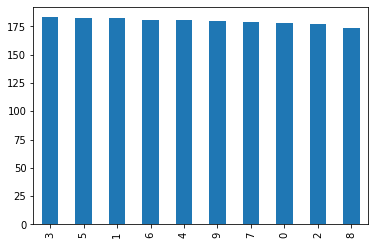

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mnist_labs[0].value_counts().plot(ax=ax, kind='bar')

It looks like our data is not skewed to any specific category, which is good! This means we can split up our data into a testing and training set without much worry. Our training set is what we're going to use to train the model, and our test set is going to be used to test how accurate it is. We're also going to convert our dataframes to numpy arrays

In [18]:
import numpy as np
# We're going to allocate 60% of the data to training, and 40% for testing
X_train = mnist_df.loc[0:round(0.60*mnist_df.shape[0])]
y_train = mnist_labs.loc[0:round(0.60*mnist_df.shape[0])]

X_test = mnist_df.loc[round(0.60*mnist_df.shape[0]):]
y_test = mnist_labs.loc[round(0.60*mnist_df.shape[0]):]


#Converting to numpy arrays
X_train = X_train.to_numpy()
print(X_train[0])
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


# Let's print out the dimensions of these arrays to make sure they make sense:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# All looks good!

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1079, 64)
(719, 64)
(1079, 1)
(719, 1)


# K Means with sklearn

First lets import the model!

In [19]:
from sklearn.cluster import KMeans

Now to initialize the model. sklearn gives us many parameter options to initialize our model with. You can initialize a KMeans model without passing in any parameters, and sklearn has default values that it automatically chooses. Instead, initialize this model with the following parameters: 

'n_clusters' This is an integer that determines how many centroid points the model will create. (default value is 8)

'max_iter' This is the maximum number of times the algorithm will iterate until ending. (default value is 300)

What value of k (i.e. the 'n_clusters' parameter) would make sense for this problem? 




In [20]:
# Fill in the parentheses below with the 2 arguments discussed
kmeans_model = KMeans()

In [21]:
#@title Solution (Double click to see)
# SOLUTION
# In this case the number of clusters should be 10 since there are 10 digits! 
# Any other number of clusters would result in unuseful results from our model
# and inaccurate predictions. We've left max_iter as 300.
kmeans_model = KMeans(n_clusters=10, random_state=42)

Now lets train our model and test its accuracy.

In [27]:
from sklearn.metrics import accuracy_score

kmeans_model.fit(X_train)
cluster_predictions = kmeans_model.predict(X_test)

# Ensures that y_test is of the shape (719,) rather than (719, 1), since
# predict() outputs a vector rather than a matrix

y_test = y_test.reshape(-1)

labels = np.zeros((10, 10))
i = 0
for prediction in cluster_predictions:
  value = y_test[i]
  labels[prediction][value] += 1
  i+=1

accuracy = accuracy_score(y_test, cluster_predictions, normalize=True, sample_weight=None)
print(f"accuracy: {accuracy}")


# You might notice that our accuracy is very low. That is because we are 
# dealing with an unsupervised learning technique, which means that each cluster 
# might not correspond to the right digit! In other words, our cluster that is 
# labelled 0 might actually correspond to the digit 3!



accuracy: 0.11543810848400557


In [28]:
labels = np.zeros((10, 10))
i = 0
for prediction in cluster_predictions:
  value = y_test[i]
  labels[prediction][value] += 1
  i+=1
labels_df = pd.DataFrame(labels)
print(labels_df)

# You should see a 2D dataframe printed. It should look a bit like the
# one below. Each row corresponds to a cluster index, while each column is a 
# digit in the label datset. So, we can see in this example that the cluster 
# labelled 0 likely corresponds to digit 3. 

#DIGITS:  0     1     2     3     4     5     6     7     8     9 

  # 0   0.0   0.0   6.0  59.0   0.0   0.0   0.0   0.0   3.0   3.0
  # 1   1.0   0.0   0.0   0.0  68.0   1.0   0.0   0.0   0.0   0.0
  # 2   0.0   0.0  58.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0
  # 3  70.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
  # 4   0.0   0.0   1.0   4.0   2.0   0.0   0.0  67.0   2.0   1.0
  # 5   0.0   0.0   0.0   0.0   0.0   2.0  73.0   0.0   0.0   0.0
  # 6   0.0   1.0   0.0   3.0   1.0  47.0   0.0   0.0   5.0   5.0
  # 7   0.0  53.0   0.0   6.0   1.0   0.0   0.0   5.0  44.0   0.0
  # 8   0.0   0.0   5.0   2.0   0.0  21.0   0.0   0.0  11.0  57.0
  # 9   0.0  19.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   5.0

      0     1     2     3     4     5     6     7     8     9
0   0.0   0.0   6.0  59.0   0.0   0.0   0.0   0.0   3.0   3.0
1   1.0   0.0   0.0   0.0  68.0   1.0   0.0   0.0   0.0   0.0
2   0.0   0.0  58.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0
3  70.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
4   0.0   0.0   1.0   4.0   2.0   0.0   0.0  67.0   2.0   1.0
5   0.0   0.0   0.0   0.0   0.0   2.0  73.0   0.0   0.0   0.0
6   0.0   1.0   0.0   3.0   1.0  47.0   0.0   0.0   5.0   5.0
7   0.0  53.0   0.0   6.0   1.0   0.0   0.0   5.0  44.0   0.0
8   0.0   0.0   5.0   2.0   0.0  21.0   0.0   0.0  11.0  57.0
9   0.0  19.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   5.0


# KNNs with sklearn

Let's move on to using the KNN model we discussed in lecture. We can import the model, instantiate an object, and train it. Notice that now we are passing in the labels to the model when we train it. When we trained K Means, we didn't do this. Why is this?

Recall that K Means is used for *unsupervised learning* tasks, meaning that the data is unlabeled. So we only trained the model with the image data, and assumed we didn't have the labels.

KNNs on the other hand are used for *supervised learning* tasks, meaning the data is labelled. 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Feel free to tinker with the n_neighbors value. There isn't a 'right' value 
# for K here, like there clearly was in K means for this problem

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
y_train = y_train.reshape(-1)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.9596662030598053


Now we're going to take a look at the different hyperparameters available in Sklearn's KNeighborsClassifier object.

As you've seen in lecture, there are different ways we can have the model measure distance. The default is euclidean distance. Let's take a look at the sklearn website which shows us all the distance metrics we can use:

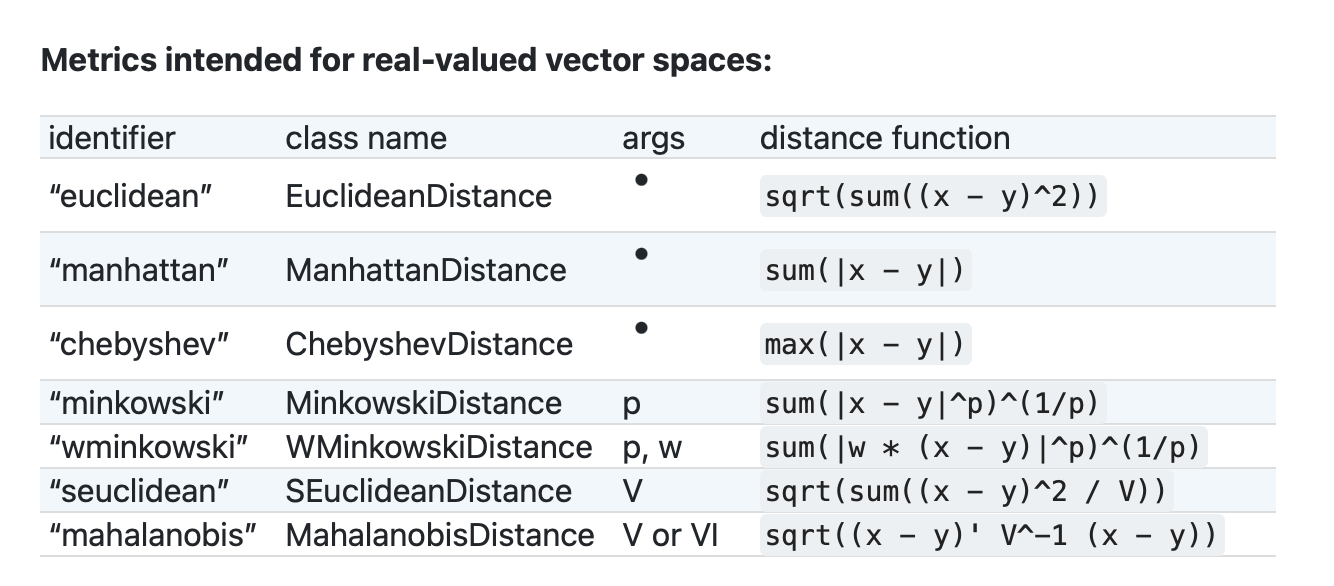



They also have a section for integer valued vector spaces. Since all of our data is integer based (i.e. we have no decimals), we can use these as well:
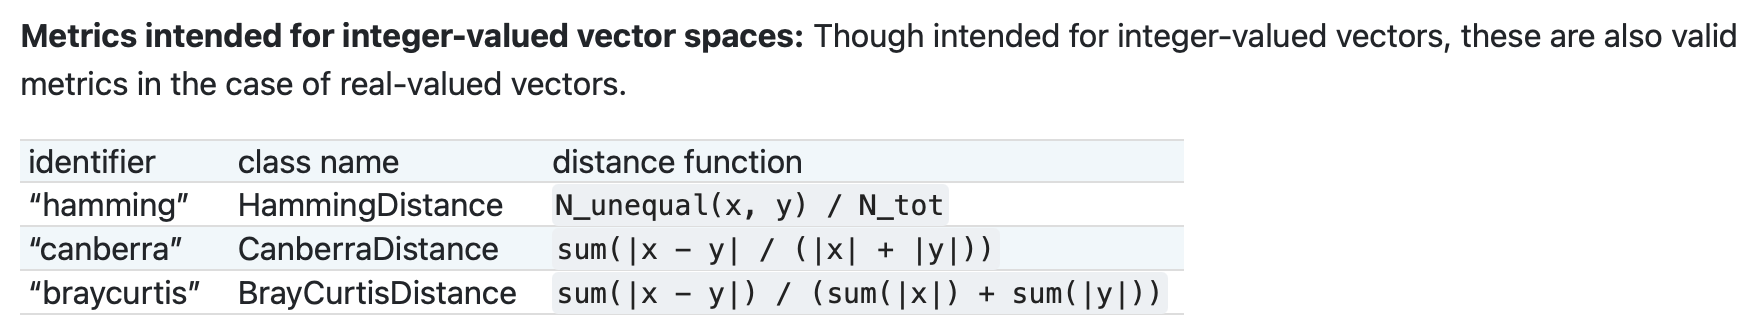


Recall that the way to modify the distance function in your model is as follows:

In [31]:
new_knn = KNeighborsClassifier(metric='hamming')

If you try using this exact model we've instantiated here however, you may find the results disappointing. As it turns out, some distance functions perform very well on this task of image classification, while others won't do very well. Try redefining new_knn below to use different distance functions, and try to figure out which ones are better. (Hint: A loop might help you try multiple distances very efficiently)

Also note that certain distance metrics have extra parameters. For example the Minkowski metric utilizes a p value, so if you use that metric you should also take advantage of setting p to different values. 

In [34]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric='euclidean')

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.9930458970792768


In [35]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric='manhattan')

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.9860917941585535


In [36]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric='chebyshev')

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.9833101529902643


In [38]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric='minkowski')

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.9930458970792768


In lecture we also discussed different search algorithms which allow the KNN model to choose its nearest neighbors from a subset of all the datapoints. This greatly reduces computation time, as the algorithm now only has to compute the distance between the point we want to classify and a small fraction of the dataset, instead of computing the distance to every point in the dataset.

We learned about KD Trees and Ball Trees as a method to do this. Take a look at the code below and change the algorithm to the different options available: 'auto', 'kd_tree', 'brute', and 'ball_tree'. Each time you run it, you'll see a metric indicating how long the computation took.

In [39]:
import os  # We'll use this to measure time difference between different lines in the code

start_time = os.times()[0]

new_knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=25)

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)

end_time = os.times()[0]

print('Time spent: ', end_time-start_time)

# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))




Time spent:  0.08999999999999986
Accuracy:  0.9652294853963839


Notice we made the K value quite high here. This was done to force the algorithm to compute a lot of distances, thus highlighting the difference between the algorithms. While the time difference between using these different algorithms is quite small, if the data set was tens of thousands of images instead of ~1700, the difference between these different algorithms would be very noticable.


Lastly, you can adjust how the model treats its k nearest neighbors. You can use the weights parameter when initializing your model, and set it equal to 'distance'. This will make the model weight neighbors that are closer, higher. In other words, if the data point we'd like to classify is t, and our k value is 4, and we find that of the 4 nearest neighbors to t, 2 are of Class A and 2 are of Class B, then we can instead weight the 2 points that are closer in order to prioritize them more. This is what the model is doing when you set weights='distance'.

You can also set weight equal to 'uniform', but this is just the standard implementation of KNN.

# References

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Further reference + cheatsheet

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view




# Analytics Vidhya Example

About Dataset – Dataset we are using here is the Mall Customers data https://www.kaggle.com/shwetabh123/mall-customers. It’s unlabeled data that contains the details of customers in a mall ( features like genre, age, annual income(k$), and spending score ). Our aim is to cluster the customers based on the relevant features annual income and spending score.

First of all, we have to import essential libraries.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

Now let’s import the dataset and slice the important features

In [42]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


We have to find the optimal K value for clustering the data. Now we are using the Elbow method to find the optimal K value.

In [44]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

“init” argument is the method for initializing the centroid. We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

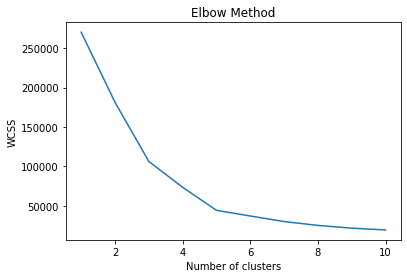

In [46]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The point at which the elbow shape is created is 5, that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the dataset with a number of clusters 5.

In [48]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

y_kmeans give us different clusters corresponding to X. Now let’s plot all the clusters using matplotlib.

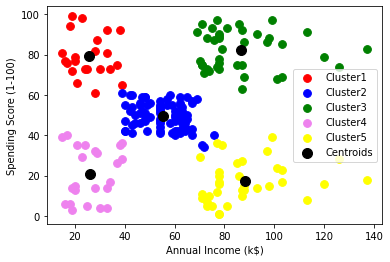

In [51]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()

As you can see there are 5 clusters in total which are visualized in different colors and the centroid of each cluster is visualized in black color.